## Exploratory Data Analysis to see impact on GBP rates over time

### 1. Import csv data into a pandas dataframe

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read csv file into a dataframe
currency_rates = pd.read_csv('gbp-daily-hist_2000_2023.csv')

# Print the columns and associated datatypes
currency_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    6188 non-null   object 
 1   USD     6188 non-null   float64
 2   EUR     6188 non-null   float64
 3   INR     6188 non-null   float64
dtypes: float64(3), object(1)
memory usage: 193.5+ KB


In [3]:
# Sense check the dataframe by printing the top 5 rows
currency_rates.head()

,Date,USD,EUR,INR
0,22/09/2023,1.225,1.150,101.691
1,21/09/2023,1.229,1.153,102.166
2,20/09/2023,1.234,1.158,102.356
3,19/09/2023,1.239,1.160,103.221
4,18/09/2023,1.238,1.158,103.105


Since the Date column is of type 'object', let's change into a date type 

In [4]:
currency_rates['Date'] = pd.to_datetime(currency_rates['Date'], dayfirst=True)

In [5]:
# Check if the Date column's type has changed
currency_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6188 entries, 0 to 6187
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    6188 non-null   datetime64[ns]
 1   USD     6188 non-null   float64       
 2   EUR     6188 non-null   float64       
 3   INR     6188 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 193.5 KB


In [6]:
# Sort the date from the past to the current
currency_rates.sort_values('Date', inplace=True)

# Reset index based on the sort
currency_rates.reset_index(drop=True, inplace=True)

# Print the df to sense check
currency_rates

,Date,USD,EUR,INR
0,2000-01-03,1.637,1.595,71.106
1,2000-01-04,1.637,1.588,71.177
2,2000-01-05,1.642,1.592,71.411
3,2000-01-06,1.647,1.595,71.624
4,2000-01-07,1.639,1.592,71.259
...,...,...,...,...
6183,2023-09-18,1.238,1.158,103.105
6184,2023-09-19,1.239,1.160,103.221
6185,2023-09-20,1.234,1.158,102.356
6186,2023-09-21,1.229,1.153,102.166


### 2. Create initial visualisation of GBP vs. USD

<Axes: xlabel='Date', ylabel='USD'>

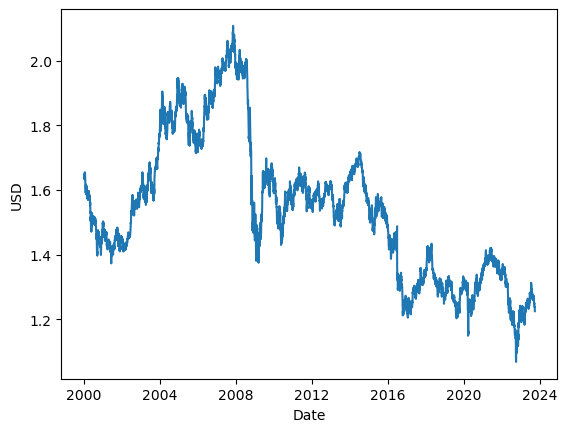

In [7]:
# Simple line plot of GBP vs. USD
sns.lineplot(x='Date', y='USD', data=currency_rates)

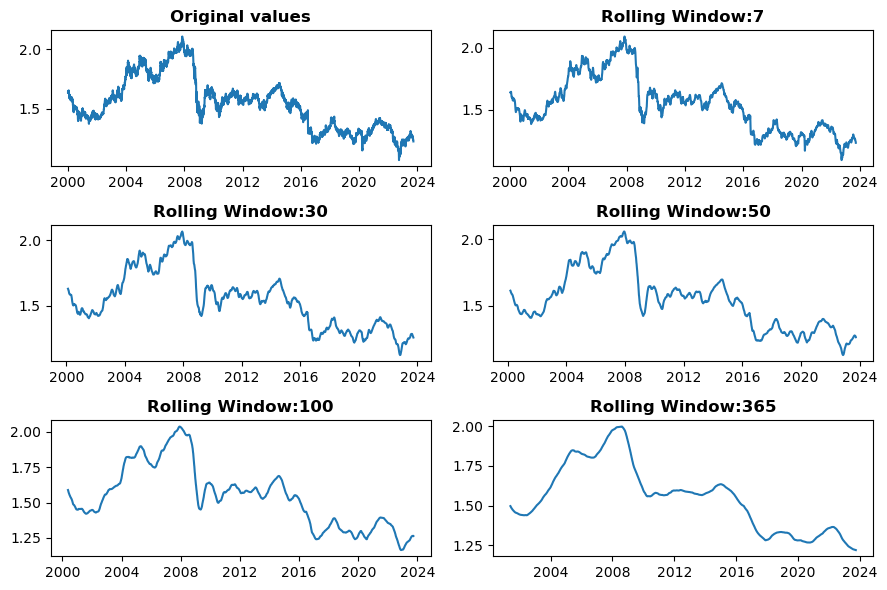

In [8]:
# Create multiple plots using various rolling means
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(currency_rates['Date'], currency_rates['USD'])
plt.title('Original values', weight='bold')

# Plot based on rolling mean of 7, 30, 50, 100 & 365
for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(currency_rates['Date'],
             currency_rates['USD'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

From the above, we can say that the last plot with rolling_mean of 365 has a bitter readability and clearly shows the time periods in which GBP has taken a hit.

- The first is possibly during the 2008-2009 Financial Crisis.
- The second one is following the Brexit vote in late 2015, and
- The last fall is possibly due to the budget measures announced by Liz Truss, resulting in increased borrowing costs and higher inflation rates

### 3. Visualisation of GBP against EUR & INR based on the above plot

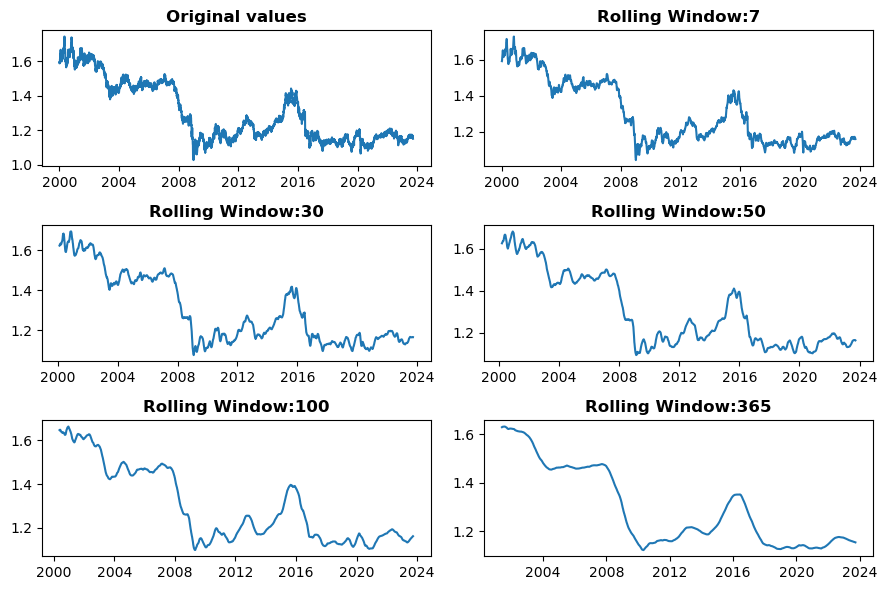

In [9]:
# Create multiple plots using various rolling means for GBP vs. EUR
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(currency_rates['Date'], currency_rates['EUR'])
plt.title('Original values', weight='bold')

# Plot based on rolling mean of 7, 30, 50, 100 & 365
for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(currency_rates['Date'],
             currency_rates['EUR'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

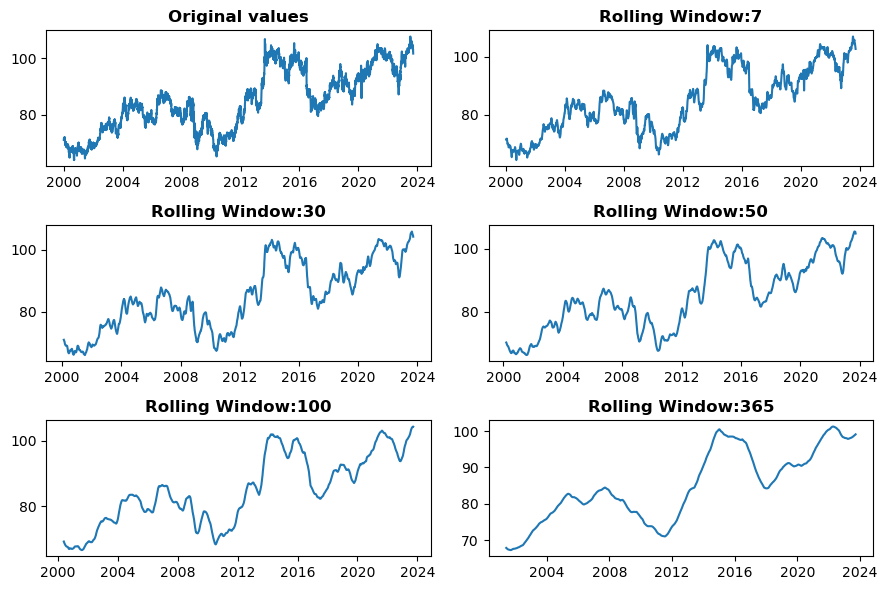

In [10]:
# Create multiple plots using various rolling means for GBP vs. INR
plt.figure(figsize=(9,6))

plt.subplot(3,2,1)
plt.plot(currency_rates['Date'], currency_rates['INR'])
plt.title('Original values', weight='bold')

# Plot based on rolling mean of 7, 30, 50, 100 & 365
for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(currency_rates['Date'],
             currency_rates['INR'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean), weight='bold')
    
plt.tight_layout() # Auto-adjusts the padding between subplots
plt.show()

### 4. A deeper look at some of the key periods during the "financial crisis"

#### 4a. Review of GBP vs. USD during the timeline

In [11]:
# Add a rolling mean column to our dataframe with 30 days as the parameter
currency_rates['rolling_mean'] = currency_rates['USD'].rolling(30).mean()

# Let's create seperate copies of the dataset to show the before, during & after periods
financial_crisis = currency_rates.copy(
                   )[(currency_rates['Date'].dt.year >= 2006
                   ) & (currency_rates['Date'].dt.year <= 2009)]
financial_crisis_7_8 = currency_rates.copy(
                   )[(currency_rates.Date.dt.year >= 2007
                   ) & (currency_rates.Date.dt.year <= 2008)]

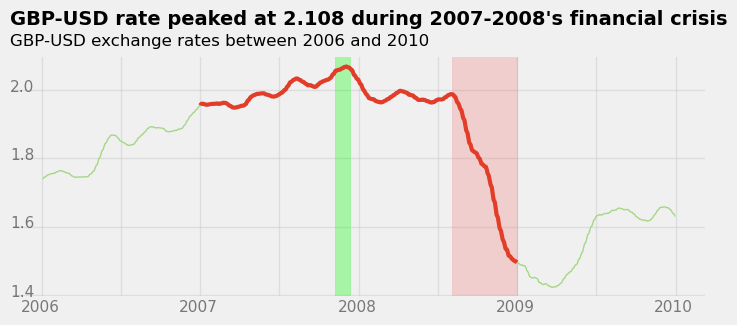

In [12]:
# Adding the FiveThirtyEight style
import matplotlib.style as style
style.use('fivethirtyeight')

# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Date'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Date'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

# Highlihting the peak of GBP during the crisis
ax.axvspan(xmin=13825, xmax=13860, ymin=0.0,
           alpha=0.3, color='lime')

# Highlihting the fall of GBP during the crisis
ax.axvspan(xmin=14095, xmax=14245, ymin=0.0,
           alpha=0.3, color='lightcoral')

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13100
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.35, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.395   
for rate in ['1.4', '1.6', '1.8', '2.0']:
    ax.text(13075, y, rate, alpha=0.5, fontsize=11)
    y += 0.20

main_title = "GBP-USD rate peaked at " + str(financial_crisis['USD'].max()) +" during 2007-2008's financial crisis"

## Adding a title and a subtitle    
ax.text(13075.0, 2.19, main_title, weight='bold')
ax.text(13075.0, 2.13, 'GBP-USD exchange rates between 2006 and 2010',
        size=12)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

#### 4b. Review of GBP vs. EUR during the timeline

In [13]:
# Add a rolling mean column to our dataframe with 30 days as the parameter
currency_rates['rolling_mean_EUR'] = currency_rates['EUR'].rolling(30).mean()

# Let's create seperate copies of the dataset to show the before, during & after periods
financial_crisis = currency_rates.copy(
                   )[(currency_rates['Date'].dt.year >= 2006
                   ) & (currency_rates['Date'].dt.year <= 2009)]
financial_crisis_7_8 = currency_rates.copy(
                   )[(currency_rates.Date.dt.year >= 2007
                   ) & (currency_rates.Date.dt.year <= 2008)]

# Sense check the dataframe
financial_crisis

,Date,USD,EUR,INR,rolling_mean,rolling_mean_EUR
1563,2006-01-02,1.723,1.457,77.653,1.739567,1.468867
1564,2006-01-03,1.745,1.453,78.460,1.740333,1.468700
1565,2006-01-04,1.758,1.450,78.539,1.741467,1.468400
1566,2006-01-05,1.754,1.450,78.244,1.742500,1.468000
1567,2006-01-06,1.770,1.457,78.448,1.744367,1.467833
...,...,...,...,...,...,...
2602,2009-12-25,1.596,1.109,74.249,1.639367,1.112033
2603,2009-12-28,1.600,1.113,74.376,1.636600,1.111667
2604,2009-12-29,1.590,1.107,74.053,1.633567,1.110867
2605,2009-12-30,1.607,1.121,74.770,1.631333,1.110933


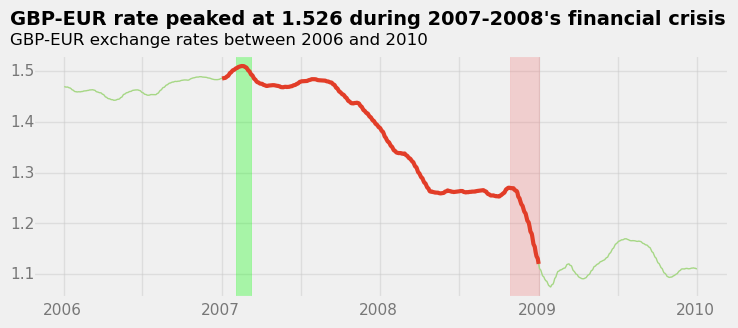

In [14]:
# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Date'],
        financial_crisis['rolling_mean_EUR'],
        linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Date'],
        financial_crisis_7_8['rolling_mean_EUR'],
        linewidth=3, color='#e23d28')

# Highlihting the peak of GBP during the crisis
ax.axvspan(xmin=13545, xmax=13580, ymin=0.0,
           alpha=0.3, color='lime')

# Highlihting the fall of GBP during the crisis
ax.axvspan(xmin=14179, xmax=14245, ymin=0.0,
           alpha=0.3, color='lightcoral')

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13100
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.02, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.09 
for rate in ['1.1', '1.2', '1.3', '1.4', '1.5']:
    ax.text(13025, y, rate, alpha=0.5, fontsize=11)
    y += 0.10

main_title = "GBP-EUR rate peaked at " + str(financial_crisis['EUR'].max()) +" during 2007-2008's financial crisis"

# Adding a title and a subtitle    
ax.text(13025.0, 1.59, main_title, weight='bold')
ax.text(13025.0, 1.55, 'GBP-EUR exchange rates between 2006 and 2010',
        size=12)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

#### 4c. Review of GBP vs. INR during the timeline

In [15]:
# Add a rolling mean column to our dataframe with 30 days as the parameter
currency_rates['rolling_mean_INR'] = currency_rates['INR'].rolling(30).mean()

# Let's create seperate copies of the dataset to show the before, during & after periods
financial_crisis = currency_rates.copy(
                   )[(currency_rates['Date'].dt.year >= 2006
                   ) & (currency_rates['Date'].dt.year <= 2009)]
financial_crisis_7_8 = currency_rates.copy(
                   )[(currency_rates.Date.dt.year >= 2007
                   ) & (currency_rates.Date.dt.year <= 2008)]

# Sense check the dataframe
financial_crisis

,Date,USD,EUR,INR,rolling_mean,rolling_mean_EUR,rolling_mean_INR
1563,2006-01-02,1.723,1.457,77.653,1.739567,1.468867,79.317200
1564,2006-01-03,1.745,1.453,78.460,1.740333,1.468700,79.305467
1565,2006-01-04,1.758,1.450,78.539,1.741467,1.468400,79.296133
1566,2006-01-05,1.754,1.450,78.244,1.742500,1.468000,79.279800
1567,2006-01-06,1.770,1.457,78.448,1.744367,1.467833,79.279200
...,...,...,...,...,...,...,...
2602,2009-12-25,1.596,1.109,74.249,1.639367,1.112033,76.203700
2603,2009-12-28,1.600,1.113,74.376,1.636600,1.111667,76.102167
2604,2009-12-29,1.590,1.107,74.053,1.633567,1.110867,75.979867
2605,2009-12-30,1.607,1.121,74.770,1.631333,1.110933,75.893000


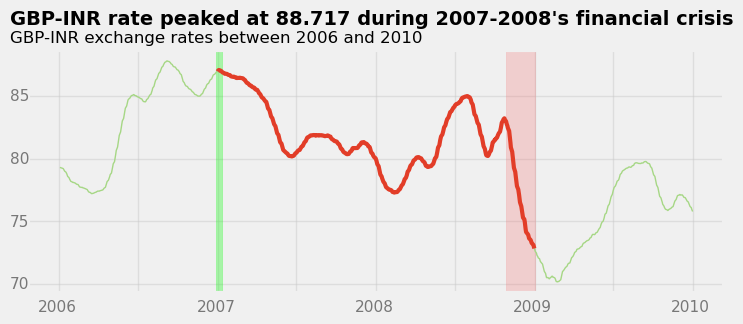

In [16]:
# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(financial_crisis['Date'],
        financial_crisis['rolling_mean_INR'],
        linewidth=1, color='#A6D785')

# Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['Date'],
        financial_crisis_7_8['rolling_mean_INR'],
        linewidth=3, color='#e23d28')

# Highlihting the peak of GBP during the crisis
ax.axvspan(xmin=13510, xmax=13525, ymin=0.0,
           alpha=0.3, color='lime')

# Highlihting the fall of GBP during the crisis
ax.axvspan(xmin=14179, xmax=14245, ymin=0.0,
           alpha=0.3, color='lightcoral')

# Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 13100
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 67.85, year, alpha=0.5, fontsize=11)
    x += 365

y = 69.65 
for rate in ['70', '75', '80', '85']:
    ax.text(13035, y, rate, alpha=0.5, fontsize=11)
    y += 5.0

main_title = "GBP-INR rate peaked at " + str(financial_crisis['INR'].max()) +" during 2007-2008's financial crisis"

# Adding a title and a subtitle    
ax.text(13035.0, 90.75, main_title, weight='bold')
ax.text(13035.0, 89.30, 'GBP-INR exchange rates between 2006 and 2010',
        size=12)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

### 5. A deeper look at GBP performance during Brexit & Covid periods

#### 5a. GBP vs. USD during the Brexit process

In [17]:
# Let's create seperate copies of the dataset 

brexit_timeline = currency_rates.copy()[
                (currency_rates['Date'] >= '2016-01-01') & (currency_rates['Date'] <= '2017-06-30')]

brexit_zone = currency_rates.copy()[
                (currency_rates['Date'] >= '2016-06-01') & (currency_rates['Date'] <= '2016-11-16')]

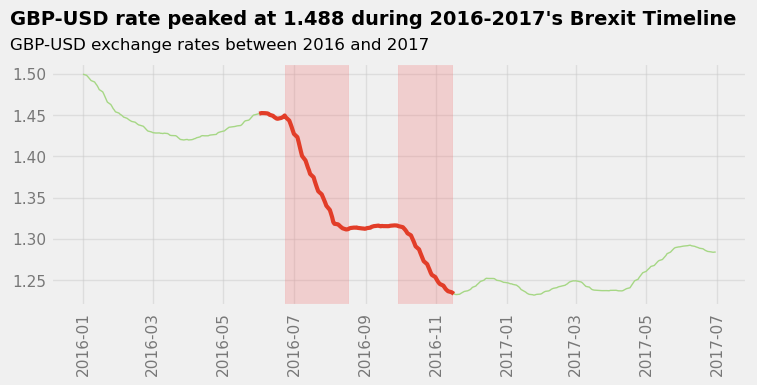

In [18]:
# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))
ax.plot(brexit_timeline['Date'],
        brexit_timeline['rolling_mean'],
        linewidth=1, color='#A6D785')

# Highlighting the Brexit period
ax.plot(brexit_zone['Date'],
        brexit_zone['rolling_mean'],
        linewidth=3, color='#e23d28')

# Highlihting the fall of GBP during the crisis
ax.axvspan(xmin=16975, xmax=17030, ymin=0.0,
           alpha=0.3, color='lightcoral')

ax.axvspan(xmin=17073, xmax=17119, ymin=0.0,
           alpha=0.3, color='lightcoral')

plt.xticks(fontsize=11, alpha=0.5, rotation=90)
plt.yticks(fontsize=11, alpha=0.5)

main_title = "GBP-USD rate peaked at " + str(brexit_zone['USD'].max()) +" during 2016-2017's Brexit Timeline"

# Adding a title and a subtitle    
ax.text(16738, 1.56, main_title, weight='bold')
ax.text(16738, 1.53, 'GBP-USD exchange rates between 2016 and 2017',
        size=12)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

From the above chart, we can clearly see 2 specific points when GBP took a major hit - 
- First impact happened right after the Brexit results were announced (24-Jun-2016), and the slide continued until early Aug '16. Between this time UK saw the resignation of David Cameron and appointment of Theresa May as the new Prime Minister.
- Second impact was around Oct '16, which is possibly when Mrs. May announced her intention to trigger Article 50; and this continued until mid Nov '16.

#### 5b. GBP vs. USD during COVID '19

In [19]:
# Let's create seperate copies of the dataset 
covid_timeline = currency_rates.copy()[
                (currency_rates['Date'] >= '2020-01-01') & (currency_rates['Date'] <= '2021-12-31')]

wave_1 = currency_rates.copy()[
                (currency_rates['Date'] >= '2020-03-01') & (currency_rates['Date'] <= '2020-05-31')]

wave_2 = currency_rates.copy()[
                (currency_rates['Date'] >= '2020-09-01') & (currency_rates['Date'] <= '2021-04-30')]


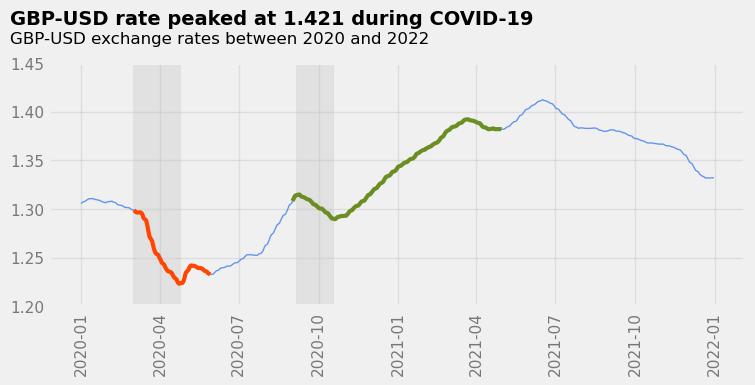

In [20]:
# Adding the plot
fig,ax = plt.subplots(figsize=(8,3))

# Set y-axis minimum
ax.set_ylim([1.20, 1.45])

ax.plot(covid_timeline['Date'],
        covid_timeline['rolling_mean'],
        linewidth=1, color='cornflowerblue')

# Highlighting the 2 waves as defined by ONS
ax.plot(wave_1['Date'],
        wave_1['rolling_mean'],
        linewidth=3, color='orangered')

ax.plot(wave_2['Date'],
        wave_2['rolling_mean'],
        linewidth=3, color='olivedrab')

# Highlihting the fall of GBP during the crisis
ax.axvspan(xmin=18322, xmax=18376, ymin=0.0, 
           alpha=0.3, color='silver')

ax.axvspan(xmin=18510, xmax=18553, ymin=0.0, 
           alpha=0.3, color='silver')

plt.xticks(fontsize=11, alpha=0.5, rotation=90)
plt.yticks(fontsize=11, alpha=0.5)

main_title = "GBP-USD rate peaked at " + str(covid_timeline['USD'].max()) +" during COVID-19"

# Adding a title and a subtitle    
ax.text(18180, 1.49, main_title, weight='bold')
ax.text(18180, 1.47, 'GBP-USD exchange rates between 2020 and 2022',
        size=12)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

Based on data from ONS, UK:
- Wave 1 is estimated to have started in March 2020 and lasted till end of May 2020 (red line in the above graph)
- Wave 2 is estimated to have started at the beginning of September 2020 and ended by April 2021 (green line in the above graph)

Effect of this on GBP-USD:
- Wave 1 certainly had a big impact on the value of pound sterling, just like any other currency as the economy, production and other factors took a massive hit.
- However, Wave 2 as highlighted by the grey shaded area only had a minimal impact. This could be because Oxford/AstraZeneca announced their vaccine availability, signalling a clear end in sight for the lockdowns to be done away with.

In conclusion, we can say that while COVID-19 did have an impact on the currency's performance, we were able to recover from it quite well.